# PyGEM Simple Test

Brandon Tober, David Rounce<br>
Carnegie Mellon University<br>
Created: 17JAN2025<br> <br>
Objective: demonstrate a simple calibration and simulation application for PyGEM.<br>

This demonstration  utilizes PyGEM's *sample_data* for Khumbu Glacier (RGI60-15.03733), which should have been downloaded during model installation and setup (see [here](https://pygem.readthedocs.io/en/latest/install_pygem.html)), but can also be downloaded directly [here](https://drive.google.com/file/d/1Wu4ZqpOKxnc4EYhcRHQbwGq95FoOxMfZ/view?usp=drive_link).<br>

> **📝 Note:**<br>
> In this notebook, any PyGEM Python scripts that are called will be preceeded by ```!```. In Jupyter Notebook, the ```!``` character is used to execute shell commands directly from a notebook cell. When you prefix a command with ```!```, Jupyter sends it to the system's command-line shell for execution, instead of interpreting it as Python code. Command-line arguments are also bracketed (e.g., ```{arg}```), when passing Python variables to a command-line shell from within a Jupyter Notebook. If executing a given PyGEM script directly from one's terminal, remove the ```!``` character and brackets ```{}``` around arguments.
>
> Some useful information for any PyGEM script can be displayed by running
```!script -h```

> **⚠️ Warning:**<br>
> Ensure that the `root` parameter in PyGEM configuration file points to the correct path for the sample dataset (should end in */sample_data/*, not */sample_data_tw/*).<br>

We'll use the bash `grep` function for this. The following cell begins with `%%bash` which is a "cell magic" that allows you to run Bash commands directly within a notebook cell. Any command in a cell that starts with `%%bash` will be executed in a Bash shell.

In [1]:
%%bash
grep 'root:' ~/PyGEM/config.yaml

root: /Users/btober/PyGEM/sample_data/sample_data # note, this parameter must be modfied as to point to the appropriate location. all other paths are assumed relative to this (inputs and outputs).


If the incorrect path is set, you may manually modify with the text editor of your choice so that the `root` parameter is set to point to wherever the appropriate sample dataset is located on your computer.<br>

Proceeding with the simple test, the following steps will be completed:
1. Simple calibration
2. Simple present-day simulation
3. Simple future simulation

First, some quick Python imports:

In [2]:
### imports ###
import os, sys, glob, json
# pygem imports
from pygem.setup.config import ConfigManager
# instantiate ConfigManager
config_manager = ConfigManager()
# read the config
pygem_prms = config_manager.read_config()   # NOTE: ensure that your root path in ~/PyGEM/config.yaml points to
                                            # the appropriate location. If any errors occur, check this first.
rootpath=pygem_prms['root']

## Simple calibration

Perform a simple model calibration using the **HH2015** method. See [here](https://pygem.readthedocs.io/en/latest/calibration_options.html) for further calibration information, or check out the [*run_calibration.ipynb*](https://github.com/PyGEM-Community/PyGEM-notebooks/blob/main/run_calibration.ipynb) notebook.<br><br>
The following parameters should either be set within your configuration file, or passed to the *run_calibration* script as command line arguments:
<pre>
glac_no =             15.03733
ref_startyear =       2000
ref_endyear =         2019
option_calibration =  HH2015
</pre>

What are the available arguments for the *run_calibration* script?

In [3]:
!run_calibration -h

usage: run_calibration [-h] [-rgi_region01 RGI_REGION01 [RGI_REGION01 ...]]
                       [-rgi_region02 RGI_REGION02 [RGI_REGION02 ...]]
                       [-ref_climate_name REF_CLIMATE_NAME]
                       [-ref_startyear REF_STARTYEAR]
                       [-ref_endyear REF_ENDYEAR]
                       [-rgi_glac_number_fn RGI_GLAC_NUMBER_FN]
                       [-rgi_glac_number RGI_GLAC_NUMBER [RGI_GLAC_NUMBER ...]]
                       [-ncores NCORES]
                       [-option_calibration OPTION_CALIBRATION]
                       [-nchains NCHAINS] [-chain_length CHAIN_LENGTH]
                       [-burn_pct BURN_PCT] [-option_ordered] [-spinup] [-p]
                       [-v]

Run PyGEM calibration

options:
  -h, --help            show this help message and exit
  -rgi_region01 RGI_REGION01 [RGI_REGION01 ...]
                        Randoph Glacier Inventory region (can take multiple,
                        e.g. `-run_region01 1 2 3`)

Above we see all the available command-line arguments for PyGEM's *run_calibration* script. Below we'll utilize some of these to calibrate our glacier of interest.

In [4]:
# passing the above parameters as command line arguments:
glac_no = 15.03733
!run_calibration -rgi_glac_number {glac_no} -ref_startyear 2000 -ref_endyear 2019 -option_calibration HH2015

Processing: ERA5
1 glaciers in region 15 are included in this model run: ['03733']
This study is focusing on 1 glaciers in region [15]
ERA5 : RGI60-15.03733
2025-10-15 17:23:55: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-15 17:23:55: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-15 17:23:55: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-10-15 17:23:55: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.
2025-10-15 17:23:55: oggm.cfg: PARAMS['dl_verify'] changed from `False` to `True`.
2025-10-15 17:23:55: oggm.cfg: PARAMS['use_multiple_flowlines'] changed from `True` to `False`.
2025-10-15 17:23:56: oggm.workflow: Execute entity tasks [GlacierDirectory] on 1 glaciers
2025-10-15 17:23:56: oggm.workflow: Execute entity tasks [consensus_gridded] on 1 glaciers
2025-10-15 17:23:56: oggm.workflow: Execute entity tasks [mb_df_to_gdir] on 1 glaciers
2025-10-15 17:23:56: 

If calibration completed successfully, we can inspect the output parameter file:

In [5]:
# check the output - the parameter dictionary output should now have an `HH2015` key
glacier_str = str(glac_no)
reg = glacier_str.split('.')[0].zfill(2)
calib_path = f"{pygem_prms['root']}/Output/calibration/{reg}/{glacier_str}-modelprms_dict.json"

with open(calib_path, 'r') as f:
    modelprms_dict = json.load(f)

print(modelprms_dict['HH2015'])

{'kp': [0.8], 'tbias': [2.160277395322323], 'ddfsnow': [0.0045], 'ddfice': [0.0064285714285714285], 'tsnow_threshold': [1], 'precgrad': [0.0001], 'mb_mwea': [-0.44592533637126686], 'mb_obs_mwea': [-0.4462], 'mb_obs_mwea_err': [0.1062]}


If calibration did not complete successfully, check for fail logs in *~/sample_data/Output/*<br>

## Simple present-day simulation

Perform a simple present-day simulation over the 2000-2020 period. Check/change the following parameters in the configuration file, or pass them as command line arguments to *run_simulation*
<pre>
glac_no =               15.03733
sim_climate_name =      ERA5
sim_startyear =         2000
sim_endyear =           2019
option_calibration =    HH2015
option_dynamics =       OGGM
use_reg_glena =         False         
</pre>
What are the available arguments for the *run_simulation* script?

In [6]:
!run_simulation -h

2025-10-15 17:23:58: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-15 17:23:58: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-15 17:23:58: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-10-15 17:23:58: oggm.cfg: PARAMS['hydro_month_nh'] changed from `10` to `1`.
2025-10-15 17:23:58: oggm.cfg: PARAMS['hydro_month_sh'] changed from `4` to `1`.
2025-10-15 17:23:58: oggm.cfg: PARAMS['trapezoid_lambdas'] changed from `2.0` to `1`.
usage: run_simulation [-h] [-rgi_region01 RGI_REGION01 [RGI_REGION01 ...]]
                      [-rgi_region02 RGI_REGION02 [RGI_REGION02 ...]]
                      [-rgi_glac_number RGI_GLAC_NUMBER [RGI_GLAC_NUMBER ...]]
                      [-ref_climate_name REF_CLIMATE_NAME]
                      [-ref_startyear REF_STARTYEAR]
                      [-ref_endyear REF_ENDYEAR]
                      [-rgi_glac_number_fn RGI_GLAC_NUMBER_FN]
                   

In [7]:
# passing the above parameters as command line arguments:
gcm_name = 'ERA5'
!run_simulation -rgi_glac_number {glac_no} -sim_climate_name {gcm_name} -sim_startyear 2000 -sim_endyear 2019 -option_calibration HH2015 -option_dynamics OGGM -use_regional_glen_a False

2025-10-15 17:24:00: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-15 17:24:00: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-15 17:24:00: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-10-15 17:24:00: oggm.cfg: PARAMS['hydro_month_nh'] changed from `10` to `1`.
2025-10-15 17:24:00: oggm.cfg: PARAMS['hydro_month_sh'] changed from `4` to `1`.
2025-10-15 17:24:00: oggm.cfg: PARAMS['trapezoid_lambdas'] changed from `2.0` to `1`.
Processing: ERA5
Processing with 1 cores...
1 glaciers in region 15 are included in this model run: ['03733']
This study is focusing on 1 glaciers in region [15]
ERA5 : RGI60-15.03733
2025-10-15 17:24:00: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-15 17:24:00: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-15 17:24:00: oggm.cfg: Multiprocessing: using all available processors (N=10)

If the simulation completed successfully, there will be an output file in *sample_data/Output/simulations*:

In [8]:
%%bash -s "$rootpath" "$reg" "$gcm_name"
ls -lah $1/Output/simulations/$2/$3/stats/*.nc

-rw-r--r--@ 1 btober  staff    55K Oct 15 17:24 /Users/btober/PyGEM/sample_data/sample_data/Output/simulations/15/ERA5/stats/15.03733_ERA5_HH2015_ba0_1sets_2000_2019_all.nc


## Simple future simulation

Now run a simple future simulation from 2000 to 2100 using the CESM2 climate model. Check/change the following parameters in the configuration file, or pass them as command line arguments to *run_simulation*
<pre>
glac_no =               15.03733
sim_climate_name =      CESM2
sim_climate_scenario =  ssp245
sim_startyear =         2000
sim_endyear =           2100
option_calibration =    HH2015
option_dynamics =       OGGM
use_regional_glen_a =   False         
</pre>

In [9]:
# passing the above parameters as command line arguments:
gcm_name = 'CESM2'
scenario = 'ssp245'
!run_simulation -rgi_glac_number {glac_no} -sim_climate_name {gcm_name} -sim_climate_scenario {scenario} -sim_startyear 2000 -sim_endyear 2100 -option_calibration HH2015 -option_dynamics OGGM -use_regional_glen_a False

2025-10-15 17:24:02: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-15 17:24:02: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-15 17:24:02: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-10-15 17:24:02: oggm.cfg: PARAMS['hydro_month_nh'] changed from `10` to `1`.
2025-10-15 17:24:02: oggm.cfg: PARAMS['hydro_month_sh'] changed from `4` to `1`.
2025-10-15 17:24:02: oggm.cfg: PARAMS['trapezoid_lambdas'] changed from `2.0` to `1`.
Processing: CESM2 ssp245
Processing with 1 cores...
1 glaciers in region 15 are included in this model run: ['03733']
This study is focusing on 1 glaciers in region [15]
CESM2 : RGI60-15.03733
2025-10-15 17:24:02: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-15 17:24:02: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-15 17:24:02: oggm.cfg: Multiprocessing: using all available processo

Check for the output:

In [10]:
%%bash -s "$rootpath" "$reg" "$gcm_name" "$scenario"
ls -lah $1/Output/simulations/$2/$3/$4/stats/*HH2015*.nc

-rw-r--r--@ 1 btober  staff    66K Oct 15 17:24 /Users/btober/PyGEM/sample_data/sample_data/Output/simulations/15/CESM2/ssp245/stats/15.03733_CESM2_ssp245_HH2015_ba1_1sets_2000_2100_all.nc


## Plot

Visualize the model output. First use xarray to load the netcdf file shown above.

In [11]:
import xarray as xr
ds = xr.open_dataset(glob.glob(f'{rootpath}/Output/simulations/{reg}/{gcm_name}/{scenario}/stats/{glac_no}_{gcm_name}_{scenario}_HH2015*_2000_2100_all.nc*')[0])
ds

<xarray.Dataset> Size: 33kB
Dimensions:               (glac: 1, time: 1212, year: 102)
Coordinates:
  * glac                  (glac) int64 8B 0
  * time                  (time) object 10kB 2000-01-01 00:00:00 ... 2100-12-...
  * year                  (year) int64 816B 2000 2001 2002 ... 2099 2100 2101
Data variables:
    RGIId                 (glac) <U14 56B ...
    CenLon                (glac) float64 8B ...
    CenLat                (glac) float64 8B ...
    O1Region              (glac) int64 8B ...
    O2Region              (glac) int64 8B ...
    Area                  (glac) float64 8B ...
    glac_runoff           (glac, time) float64 10kB ...
    glac_area_annual      (glac, year) float64 816B ...
    glac_mass_annual      (glac, year) float64 816B ...
    glac_mass_bsl_annual  (glac, year) float64 816B ...
    glac_ELA_annual       (glac, year) float64 816B ...
    offglac_runoff        (glac, time) float64 10kB ...
Attributes:
    source:            PyGEMv1.0.4
    institution:       Carnegie Mellon University, Pittsburgh PA
    history:           Created by David Rounce (drounce@cmu.edu) on 2025-10-15
    references:        doi:10.1126/science.abo1324
    model_parameters:  {"ref_startyear": 2000, "ref_endyear": 2019, "sim_star...

We can see the model output dataset above. We'll plot the glacier runorr, mass, and area, but feel free to experiment with other variables and analyses.

In [12]:
# pull monthly runoff and resample to annual values
k = 'glac_runoff'
# runoff is monthly, so sum to yealy vals
ds_sum = ds[k][0].resample(time='YE').sum('time')
# append annual runoff to list
annual_runoff = ds_sum.values

# pull annual area
k = 'glac_area_annual'
# note, PyGEM annual area is the area at the beginning of each model year
# to align with plotting the total runoff from each year, we'll take index [1:],
# inidicating we're analyzing values for the end of each model year
annual_area = ds[k][0].values[1:]


# pull annual mass
k = 'glac_mass_annual'
# note, PyGEM annual mass is the mass at the beginning of each model year
# to align with plotting the total runoff from each year, we'll take index [1:],
# inidicating we're analyzing values for the end of each model year
annual_mass = ds[k][0].values[1:]

# get model years - note indexing [:-1]
# for a simulation that ran from 2000 thru 2100
year = (ds.year.values[:-1:])

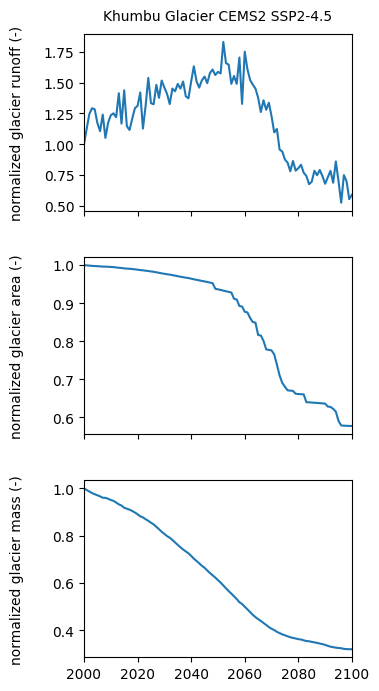

In [13]:
# create 3 x 1 plot with runoff, area, mass
import matplotlib.pyplot as plt
# initialize figure
fig,ax = plt.subplots(3,figsize=(4,7),sharex=True)
ax[0].plot(year,annual_runoff/annual_runoff[0])

ax[1].plot(year,annual_area/annual_area[0])

ax[2].plot(year,annual_mass/annual_mass[0])

# set x axis limits to temporal extent of our data
ax[0].set_xlim([2000,2100])
# create x and y axis labels
ax[0].text(-0.25, 0.5, 'normalized glacier runoff (-)', va='center', ha='center', rotation=90, transform=ax[0].transAxes)
ax[1].text(-0.25, 0.5, 'normalized glacier area (-)', va='center', ha='center', rotation=90, transform=ax[1].transAxes)
ax[2].text(-0.25, 0.5, 'normalized glacier mass (-)', va='center', ha='center', rotation=90, transform=ax[2].transAxes)
# title
ax[0].text(.5, 1.1, 'Khumbu Glacier CEMS2 SSP2-4.5', va='center', ha='center', rotation=0, transform=ax[0].transAxes)
fig.tight_layout()

## Next: try a more advanced test
See, the [*advanced_test.ipynb*](https://github.com/PyGEM-Community/PyGEM-notebooks/blob/main/advanced_test.ipynb) Jupyter Notebook.